<a href="https://colab.research.google.com/github/m-ritam/ML/blob/main/Decision_tree_kyphosis_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
kyphosis_data = pd.read_csv("/content/drive/My Drive/Excel file to use in colab/kyphosis_data.csv")

In [45]:
kyphosis_data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [46]:
X = kyphosis_data.drop('Kyphosis', axis=1) #extracting the independent variable

In [47]:
y = kyphosis_data['Kyphosis'] #extracting the dependent variable

<Axes: xlabel='Kyphosis', ylabel='Age'>

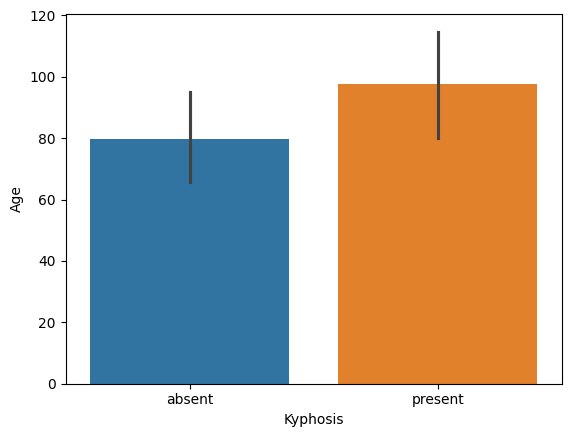

In [50]:
sns.barplot(x='Kyphosis', y='Age', hue='Kyphosis', data=kyphosis_data)

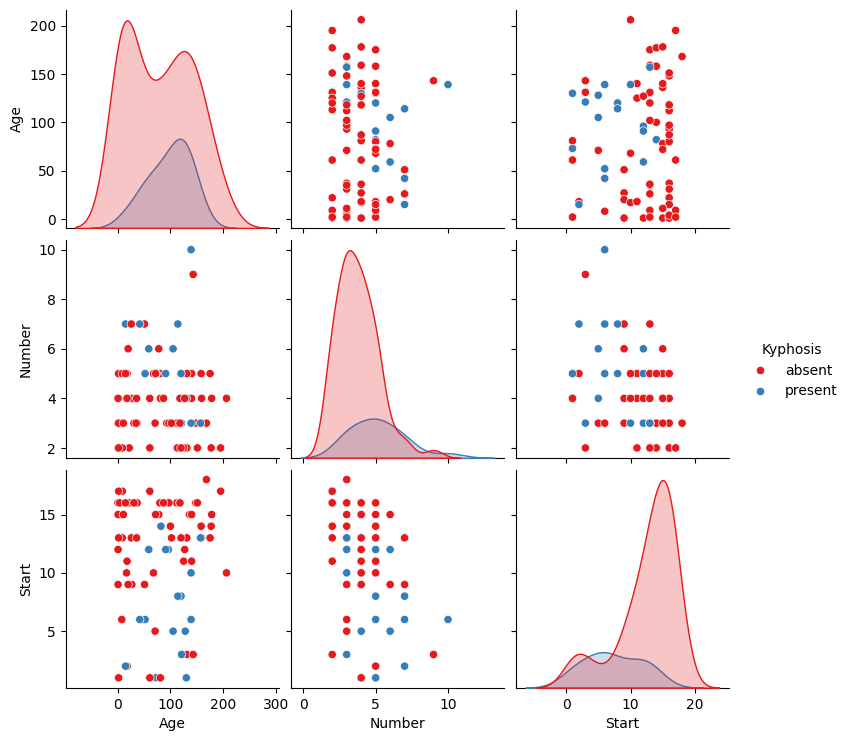

In [51]:
sns.pairplot(kyphosis_data,hue='Kyphosis', palette='Set1')

<Axes: xlabel='Age', ylabel='count'>

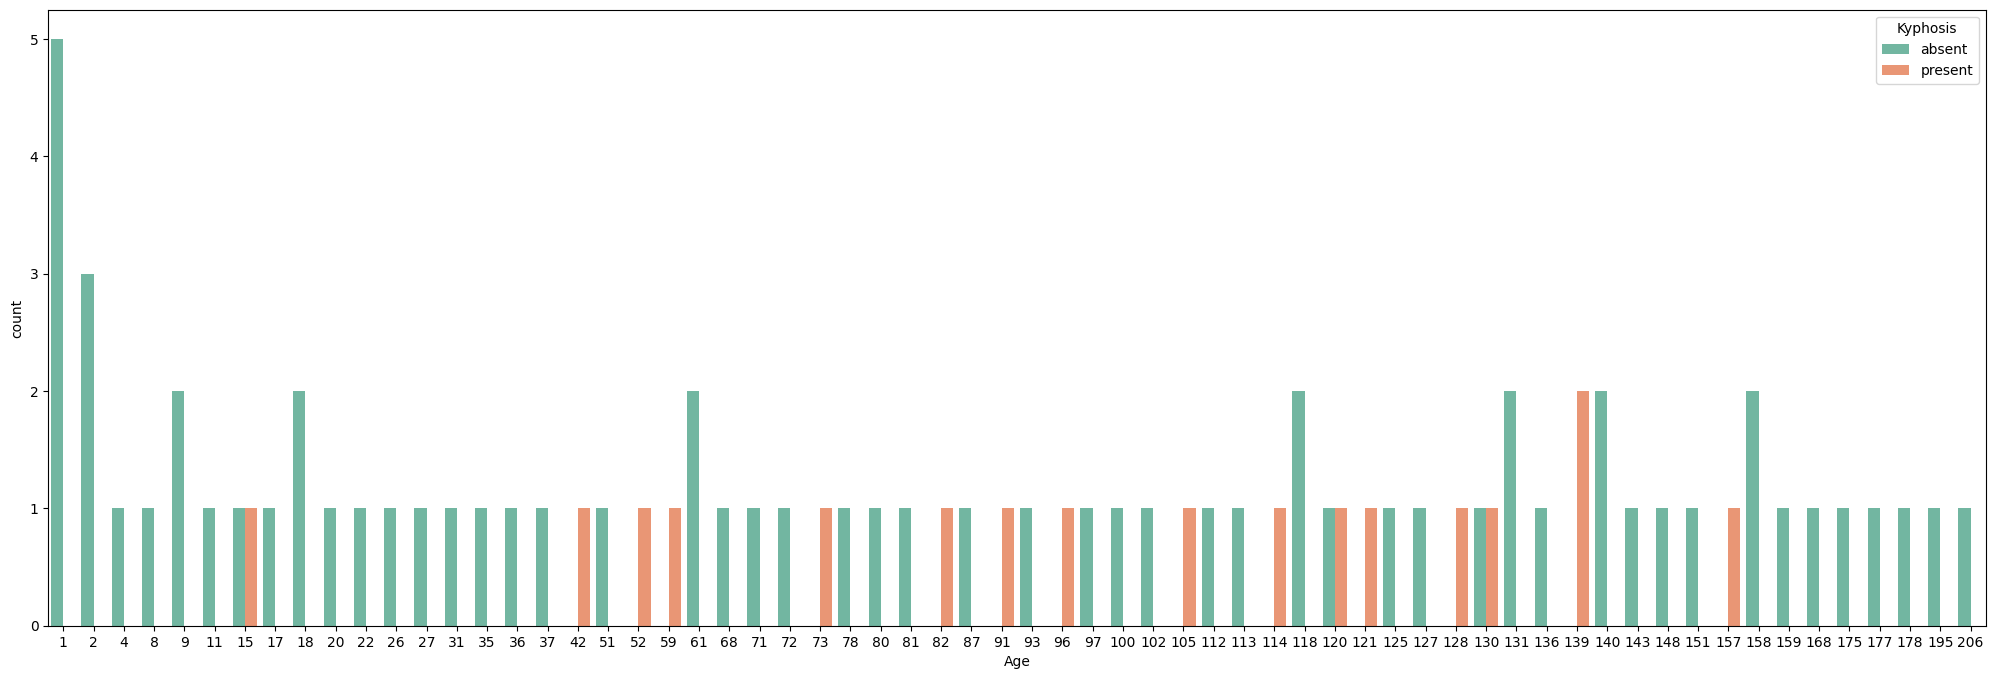

In [53]:
#visualizing
plt.figure(figsize=(25,8))
sns.countplot(x='Age', hue='Kyphosis', data=kyphosis_data, palette='Set2')

In [54]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [55]:
X=kyphosis_data.drop('Kyphosis',axis=1)
y=kyphosis_data['Kyphosis']

In [56]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [57]:
x=kyphosis_data.iloc[:,[1,2,3]].values

In [58]:
y.head()

,Kyphosis
0,absent
1,absent
2,present
3,absent
4,absent


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [60]:
#Training Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dtree = DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
#predicting the model

predictions = dtree.predict(X_test)
predictions

array(['absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

In [63]:
print(confusion_matrix(y_test,predictions))

[[14  8]
 [ 2  1]]


In [64]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
rfc_pred = rfc.predict(X_test)

In [66]:
print(confusion_matrix(y_test,rfc_pred))

[[19  3]
 [ 3  0]]


In [67]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        22
     present       0.00      0.00      0.00         3

    accuracy                           0.76        25
   macro avg       0.43      0.43      0.43        25
weighted avg       0.76      0.76      0.76        25

